8
| label | P@20 | P@40 | P@60 |
| --- | --- | --- | --- |
| zxb | 1.0 | 0.95 | 0.6333333333333333 |
| nm | 1.0 | 1.0 | 1.0 |
| sy | 1.0 | 1.0 | 1.0 |
| tsg | 1.0 | 1.0 | 1.0 |
| mhb | 1.0 | 0.725 | 0.5 |
| sjz | 1.0 | 1.0 | 1.0 |
| tyht | 1.0 | 1.0 | 1.0 |
| other | 0.5 | 0.4 | 0.3 |


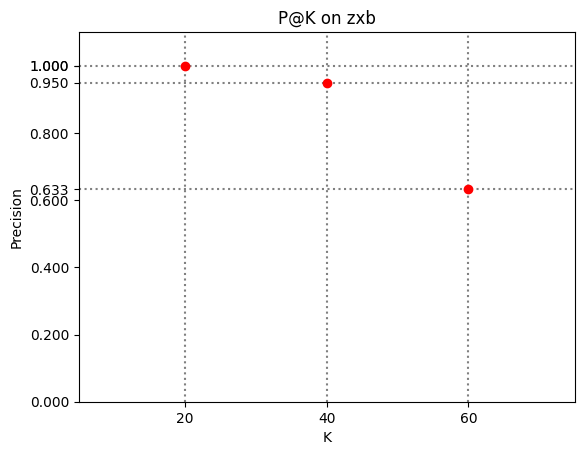

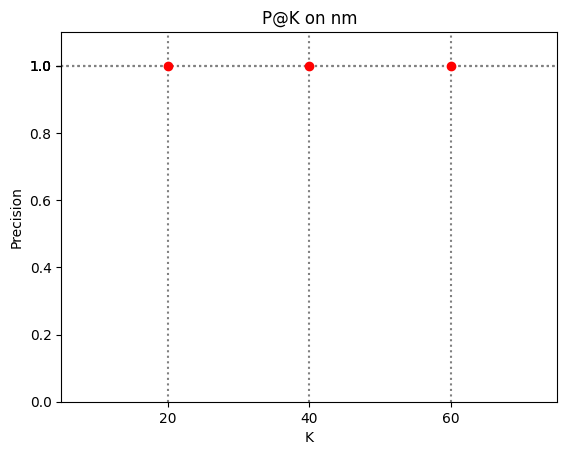

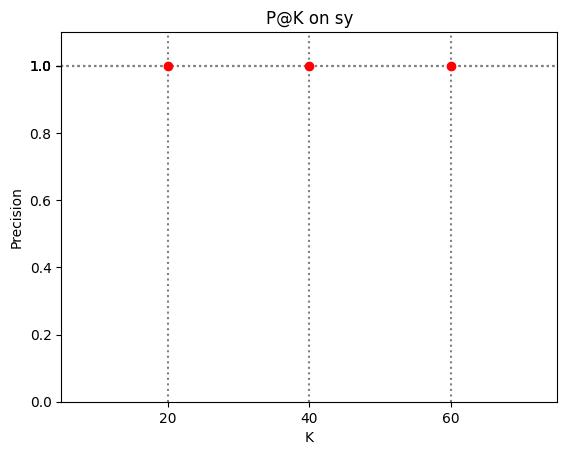

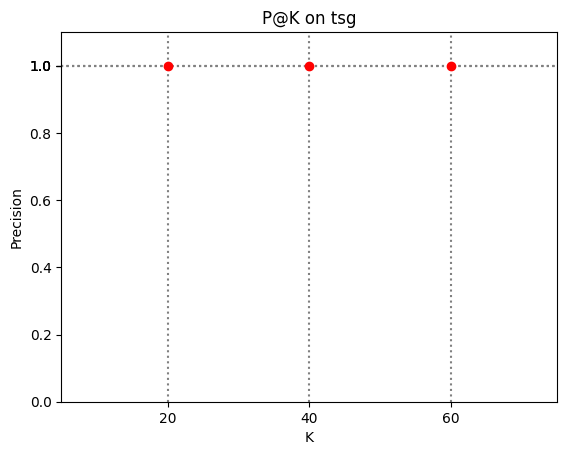

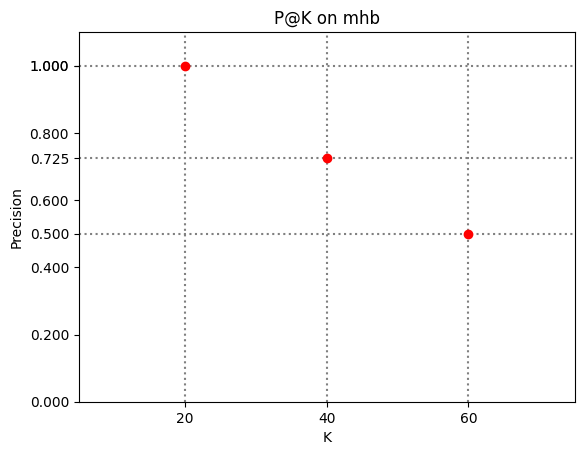

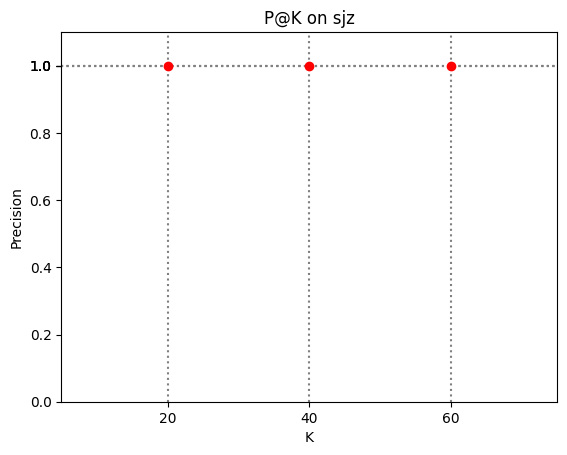

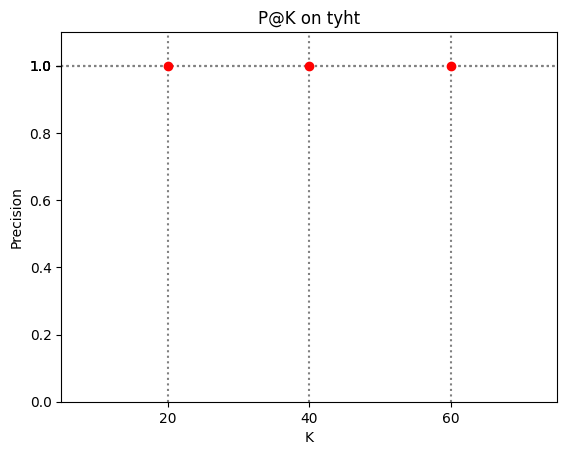

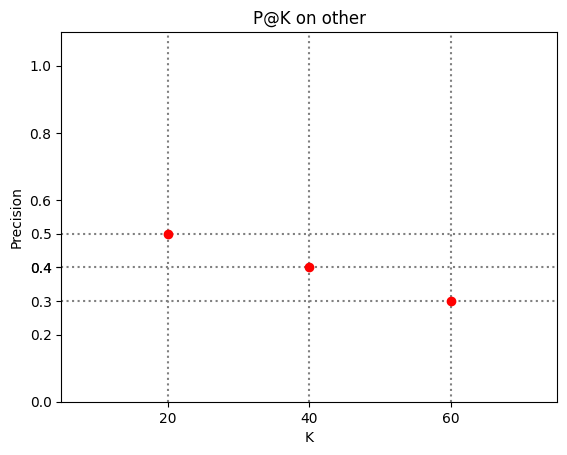

In [4]:
import matplotlib.pyplot as plt
import numpy as np


school_labels = ["zxb","nm","sy","tsg","mhb","sjz","tyht"]
other_labels = ["all_souls","ashmolean","balliol","bodleian","christ_church","cornmarket","hertford","jesus","keble","magdalen","new","oriel","oxford","pitt_rivers","radcliffe_camera","trinity","worcester"]
all_labels = school_labels + ["other"] #other_labels
print(len(all_labels))

label_dict = {}
for i, tag in enumerate(all_labels):
    label_dict[tag] = i



datas=np.load('labels_line_DenseNet.npy')
line_count=datas.shape[0]

# Evaluation complete in 0m 11s
# Best val Acc: 0.920863

print("| {} | {} | {} | {} |".format("label","P@20","P@40","P@60"))
print("| --- | --- | --- | --- |")

for i in range(line_count)[0:]:

    plt.figure(i+1)
    plt.axis([5, 75, 0, 1.1])
    plt.xlabel("K")
    plt.ylabel("Precision")
    plt.title("P@K on " + all_labels[i])
    plt.xticks(np.arange(0, 80, 20)[1:])

    lined=datas[i]
    temp = lined[:,0]
    lined[:,0] = lined[:,1]
    lined[:,1] = temp
    pointK20=lined[20]
    pointK40=lined[40]
    pointK60=lined[60]

    Ps=np.array([pointK20[1]/20,pointK40[1]/40,pointK60[1]/60])
    Ks=[20,40,60]
    
    plt.yticks(np.concatenate([np.arange(0, 1.1, 0.2),Ps]))
    
    plt.axline((0,pointK20[1]/20),(20,pointK20[1]/20),color='grey',linestyle=':')
    plt.axline((20,pointK20[1]/20),(20,0),color='grey',linestyle=':')
    plt.axline((0,pointK40[1]/40),(40,pointK40[1]/40),color='grey',linestyle=':')
    plt.axline((40,pointK40[1]/40),(40,0),color='grey',linestyle=':')
    plt.axline((0,pointK60[1]/60),(60,pointK60[1]/60),color='grey',linestyle=':')
    plt.axline((60,pointK60[1]/60),(60,0),color='grey',linestyle=':')

    plt.plot(20,pointK20[1]/20,"ro")
    plt.plot(40,pointK40[1]/40,"ro")
    plt.plot(60,pointK60[1]/60,"ro")

    plt.savefig("./densenet/P@K on " + all_labels[i] + ".png")
    print("| {} | {} | {} | {} |".format(all_labels[i],pointK20[1]/20,pointK40[1]/40,pointK60[1]/60))


